In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cmcrameri
import cmcrameri.cm as cmc
from scipy.stats import pearsonr
from PIL import Image
import matplotlib.patches as mpatches

In [2]:
Chao_Shen_Normalized = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/grouped_for_LMM_Chao_Shen_Normalized.csv")
Normalized =  pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/grouped_for_LMM.csv")

In [3]:
Chao_Shen_Normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3051 non-null   int64  
 1   Agent_ID        3051 non-null   int64  
 2   Agent_Type      3051 non-null   object 
 3   Participant_ID  3051 non-null   int64  
 4   Experiment      3051 non-null   int64  
 5   min             3051 non-null   float64
 6   max             3051 non-null   float64
 7   median          3051 non-null   float64
 8   mean            3051 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 214.7+ KB


In [4]:
Normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3051 non-null   int64  
 1   Agent_ID        3051 non-null   int64  
 2   Agent_Type      3051 non-null   object 
 3   Participant_ID  3051 non-null   int64  
 4   Experiment      3051 non-null   int64  
 5   min             3051 non-null   float64
 6   max             3051 non-null   float64
 7   median          3051 non-null   float64
 8   mean            3051 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 214.7+ KB


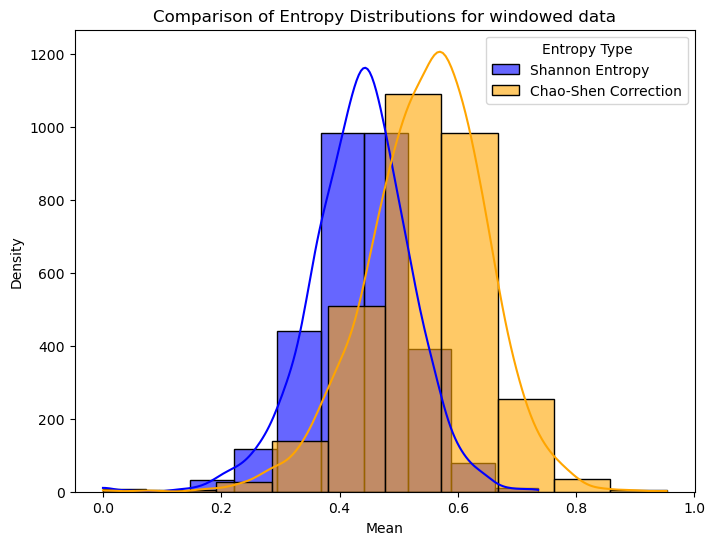

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the first histogram
sns.histplot(Normalized["mean"], kde=True, label="Shannon Entropy", color="blue", bins=10, alpha=0.6)

# Plot the second histogram
sns.histplot(Chao_Shen_Normalized["mean"], kde=True, label="Chao-Shen Correction", color="orange", bins=10, alpha=0.6)

# Add legend, title, and labels
plt.legend(title="Entropy Type")
plt.title("Comparison of Entropy Distributions for windowed data")
plt.xlabel("Mean")
plt.ylabel("Density")

# Show the plot
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Chao-Shen_Windowed.png", dpi=600, bbox_inches="tight")
plt.show()


NameError: name 'stacked_df' is not defined

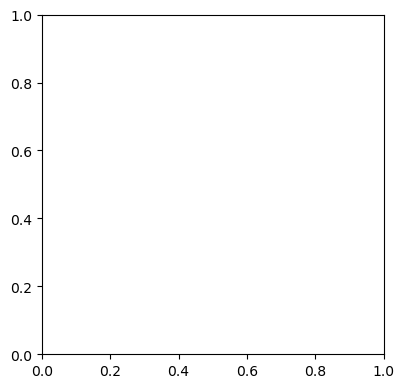

In [6]:
# Define pairs of columns: one with and one without the "Chao_Shen_" prefix
column_pairs = [
    ("Transition_Entropy_Background", "Chao_Shen_Transition_Entropy_Background"),
    ("Transition_Entropy_Building", "Chao_Shen_Transition_Entropy_Building"),
    ("Transition_Entropy_TaskBuilding_Public", "Chao_Shen_Transition_Entropy_TaskBuilding_Public"),
    ("Transition_Entropy_TaskBuilding_Residential", "Chao_Shen_Transition_Entropy_TaskBuilding_Residential"),
    ("Transition_Entropy_Global_Landmark", "Chao_Shen_Transition_Entropy_Global_Landmark"),
    ("Transition_Entropy_Passive_Agent", "Chao_Shen_Transition_Entropy_Passive_Agent"),
    #("Transition_Entropy_Passive_Agent_Face", "Chao_Shen_Transition_Entropy_Passive_Agent_Face"),
    ("Transition_Entropy_Active_Agent", "Chao_Shen_Transition_Entropy_Active_Agent"),
    #("Transition_Entropy_Active_Agent_Face", "Chao_Shen_Transition_Entropy_Active_Agent_Face"),
]

# Create a grid layout with multiple plots per row
cols_per_row = 3  # Number of plots per row
num_rows = -(-len(column_pairs) // cols_per_row)  # Calculate number of rows needed

plt.figure(figsize=(cols_per_row * 5, num_rows * 5))  # Adjust figure size based on grid layout
for idx, (col, chao_col) in enumerate(column_pairs, 1):
    plt.subplot(num_rows, cols_per_row, idx)
    sns.histplot(stacked_df[col], kde=True, label="Shannon Entropy", color="blue", bins=10, alpha=0.6)
    sns.histplot(stacked_df[chao_col], kde=True, label="Chao-Shen correction", color="orange", bins=10, alpha=0.6)

    # Extract the word for the title, handle special cases for "agent" and "face"
    col_split = col.split("_")
    if col_split[-1].lower() == "agent" and col_split[-2].lower() == "face":
        title_word = "_".join(col_split[-4:])
    elif col_split[-1].lower() == "agent":
        title_word = "_".join(col_split[-2:])
    else:
        title_word = col_split[-1]
    plt.title(f"Distribution: {title_word.replace('_', ' ')}", fontsize=16)
    plt.xlabel("Entropy Value", fontsize=16)
    plt.ylabel("Density", fontsize=16)

# Add a legend outside of the figure, centered above all subplots
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.figlegend(title="Metrics", labels=["Shannon Entropy", "Chao-Shen correction"], loc="upper center", bbox_to_anchor=(0.5, 0.98), ncol=2, fontsize=18)
plt.show()